<a href="https://colab.research.google.com/github/gbourzikas/DDS6306/blob/master/Bourzikas_Homework_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantifying the World - Fall 2021
### Case Study 6| NN
### Grant Bourzikas

## Abstract
The problem that has been brought to our data science team comes from an old client that is presenting us with a new semiconductor problem.  After the success of the last assignment, they are bringing a new and large semiconductor dataset and they want us to be able to predict the existence of a new particle.  The problem is a binary classification problem and we will leverage a neural network because of the quantity and complexity of data.  

After reviewing the results of the Neural Networks, the clear winner was the Layered model with with a 88.066% accuracy and a loss of 26.5%.

# Introduction
The problem that has been brought to our data science team comes from an old client that is presenting us with a new semiconductor problem.  After the success of the last assignment, they are bringing a new and large semiconductor dataset and they want us to be able to predict the existence of a new particle.  The problem is a binary classification problem and we will leverage a neural network because of the quantity of data.  


The goal of the study is to develop and use Neural network and we will use two different models.  The first model will be a basic sequential model and the second will be a manual built custom layered neural network. We will leverage a binary Target field which will be the independent variable (y) that will be used predict the whether or not the data represents the new particle. 

In reviewing the data, the data contains 7 million rows and 28 features.


In [ ]:
print("Semiconductor Dataset - Rows:", df.shape[0], "Columns/Features", df.shape[1])

Semiconductor Dataset - Rows: 7000000 Columns/Features 29


# Exploratory Data Analysis
After analyzing the dataset, we used the MinMaxScaler and then analyzed the data to ensure the data was normally distributed by running histograms for each field.  Next, we split the data in a 20% test and 80% training set to ensure validation of the model.

# Model Overview
After the exploratory data analysis was performed we developed the follwing two models:
##### Model 1 – Sequential Neural Network
##### Model 2 - Layered Neural Network



#  Results
## Model 1 - Sequential Neural Network
For the  Sequential Neural Network model, multiple attempts were made to optimize the model. We leveraged 2, 3, and 4 layers using different activation functions such as Sigmoid, ReLU, and tah, and elu.  Additioanlly, we use multiple optmizers such as ADAM, SGD, and Adadelta.  Additionlly, instead of running the model on our systems, we levered Google Colab's GPU and was able to run an epoch in under 20 seconds with 1000 batch size.

Are final sequentail model was 4 layers, all layers using the sigmoid functions, optmized using the ADAM fucntion for Binary Crossentropy and leveraging the Accuracy Metric.  Additionally, we used 10 epochs with a batch size of 1000 and implemented Early Stopping of 1 epoch based on the validation loss in the dataset.

In [ ]:
model_Classify.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               14500     
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dense_5 (Dense)             (None, 100)               25100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 164,951
Trainable params: 164,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(f"The following is the Accuracy from the Sequential Neural Network {model_Classify.history.history['accuracy'][-1]:.3%} ")
print(f"With a Loss of {model_Classify.history.history['loss'][-1]:.3%}")

The following is the Accuracy from the Sequential Neural Network 85.995% 
With a Loss of 29.715%


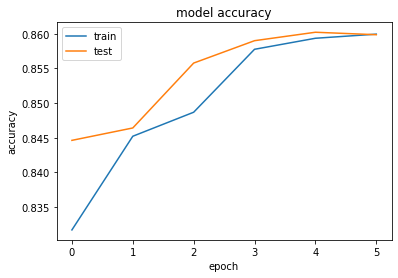

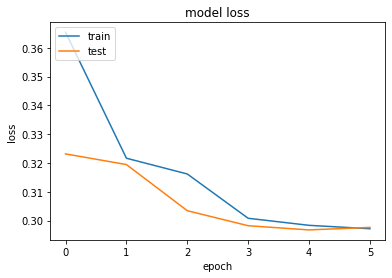

In [ ]:
# print(model_Classify.history.history.keys())
# summarize history for accuracy
plt.plot(model_Classify.history.history['accuracy'])
plt.plot(model_Classify.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_Classify.history.history['loss'])
plt.plot(model_Classify.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model 2 - Layered Neural Network
For the  Layered Neural Network model, multiple attempts were made to optimize the model. Similary to the previous model, we leveraged multiple different layers, activation functions, and optmizers.  

The final sequentail model was 6 layers, the first 5 layers used the ReLU  function and the last layer levered the Softmax function.  The difference in this model, as seen in the model summary, we concatenated layer 7 and 8.  Additionally, we used the ADAM optmizer with Sparse Categorical Crossentropy leveraging the Accuracy Metric.  Same as before, we used 10 epochs with a batch size of 1000 and  Early Stopping of 1 epoch based on the validation loss in the dataset.

In [ ]:
model_new.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 500)          14500       ['input_5[0][0]']                
                                                                                                  
 dense_16 (Dense)               (None, 200)          100200      ['dense_15[0][0]']               
                                                                                                  
 dense_17 (Dense)               (None, 100)          20100       ['dense_16[0][0]']               
                                                                                            

In [ ]:
print(f"The following is the Accuracy from the Sequential Neural Network {model_new.history.history['accuracy'][-1]:.3%} ")
print(f"With a Loss of {model_new.history.history['loss'][-1]:.3%}")

The following is the Accuracy from the Sequential Neural Network 88.066% 
With a Loss of 26.479%


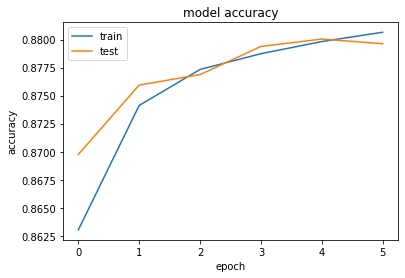

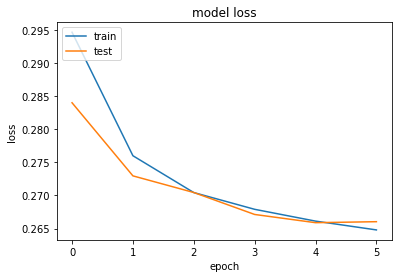

In [ ]:
# print(model_Classify.history.history.keys())
# summarize history for accuracy
plt.plot(model_new.history.history['accuracy'])
plt.plot(model_new.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_new.history.history['loss'])
plt.plot(model_new.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusion
After reviewing the results of the Neural Networks, the clear winner was the Layered model with with a 88.066% accuracy and a loss of 26.5%.

In [ ]:
# Start Code

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from time import time
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/all_train.csv')

In [ ]:
df.shape

(7000000, 29)

In [ ]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('#', '')
df.rename(columns = {'label': 'target'}, inplace = True) 
df.head()

,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,0.754261,2.269852,-1.300984,-1.199420,-1.161915,3.357043,0.460796,-0.404118,-0.815440,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,0.754261,0.459217,-0.695640,0.359856,-1.161915,-0.502048,0.505149,-1.500441,1.226331,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,0.754261,-1.031239,1.912465,-1.321417,-1.161915,-0.406757,1.346497,-0.298099,1.226331,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,0.754261,1.142262,0.551081,1.016731,0.860649,0.454005,0.624624,1.439072,-0.815440,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,-1.325801,-0.181512,-1.329374,0.879087,0.860649,-0.143564,-1.293935,-1.222800,-0.815440,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [ ]:
X = df.drop(['target'],axis=1)
y = df['target'].values
y = y.astype(int)

In [ ]:
print(X.shape)
print(y.shape)

(7000000, 28)
(7000000,)


In [ ]:
y


array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,0.754261,2.269852,-1.300984,-1.199420,-1.161915,3.357043,0.460796,-0.404118,-0.815440,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.000000
1,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,0.754261,0.459217,-0.695640,0.359856,-1.161915,-0.502048,0.505149,-1.500441,1.226331,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.000000
2,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,0.754261,-1.031239,1.912465,-1.321417,-1.161915,-0.406757,1.346497,-0.298099,1.226331,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.000000
3,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,0.754261,1.142262,0.551081,1.016731,0.860649,0.454005,0.624624,1.439072,-0.815440,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.000000
4,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,-1.325801,-0.181512,-1.329374,0.879087,0.860649,-0.143564,-1.293935,-1.222800,-0.815440,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,1.617264,-0.537084,-1.275867,0.650799,-1.511621,0.850488,0.596391,-0.054678,0.728849,0.754261,0.642273,-0.830321,-0.135583,-1.161915,-0.080789,-0.387230,0.395537,-0.815440,0.664328,-0.960709,-0.894011,1.743123,-0.426198,-0.324286,-0.432739,1.340297,0.267774,750.000000
6999996,-0.511357,0.270927,0.085989,-0.243802,-1.035668,-0.005984,-0.127219,0.721426,1.404479,-1.325801,-0.116903,1.924123,-0.324101,0.860649,0.435727,-0.307681,0.520873,1.226331,-1.015462,1.367217,-1.053815,-0.573682,-1.907798,0.194661,-0.190621,0.027776,-0.316018,1250.000000
6999997,0.062408,-0.987203,0.570667,1.517195,0.639548,-1.054221,1.115239,1.261928,-1.009308,0.754261,0.606688,-0.671159,0.910398,0.860649,1.012521,1.395015,-1.292659,-0.815440,0.790842,0.892545,-0.192816,-0.573682,0.973622,1.034964,-0.340661,-0.181193,1.877042,1500.000000
6999998,1.659131,1.096223,0.562821,1.627193,0.767236,-1.054221,1.079999,0.155488,-1.412207,-1.325801,1.426934,0.010469,-0.912317,0.860649,1.287494,0.457677,0.222345,1.226331,-0.671423,-0.308908,-0.568336,-0.573682,1.043119,1.270350,0.217405,0.120213,1.073020,1500.000000


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(X)

multiplied_by = scaler.scale_[7]
added = scaler.min_[7]

scaled_train_df = pd.DataFrame(scaled_train, columns=X.columns.values)

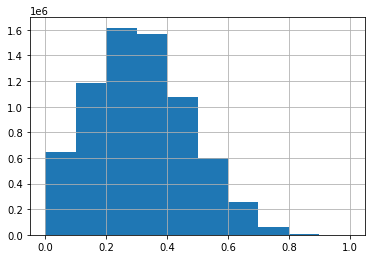

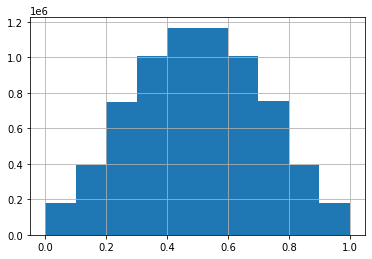

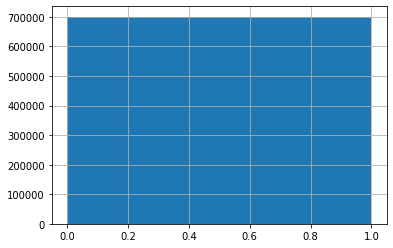

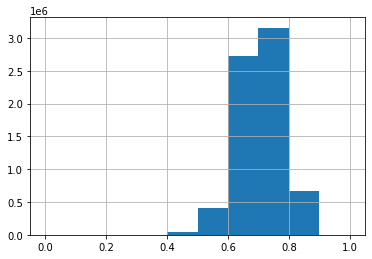

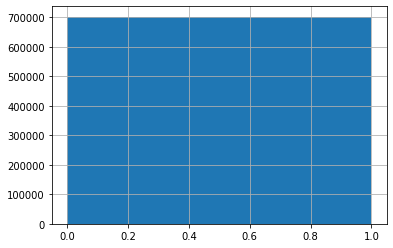

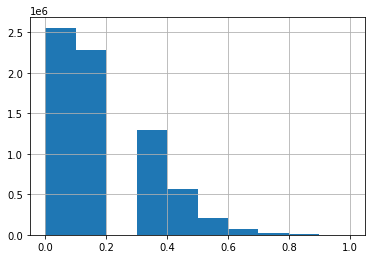

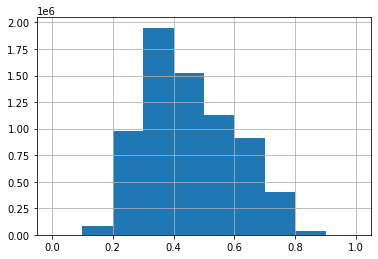

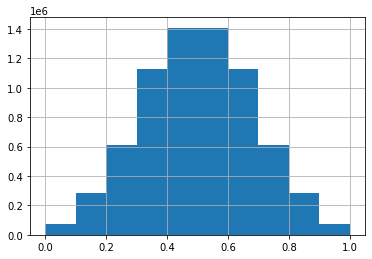

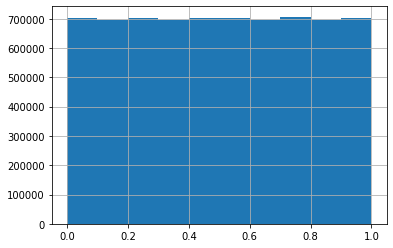

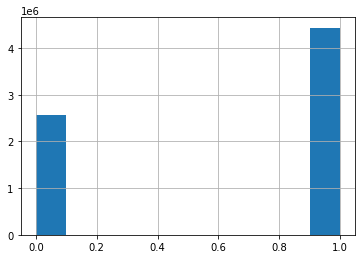

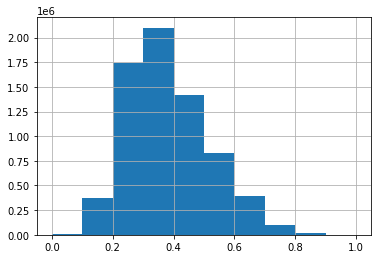

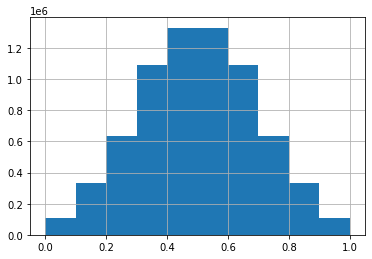

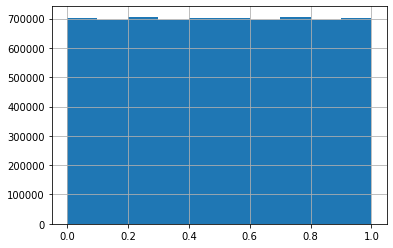

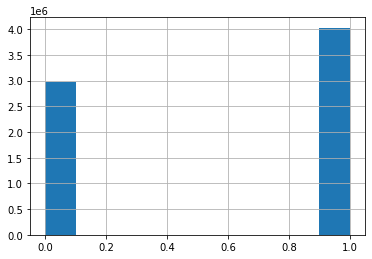

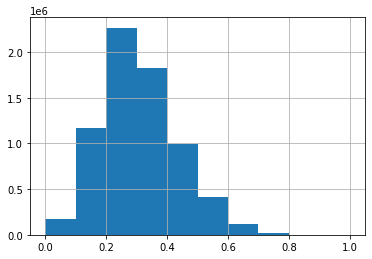

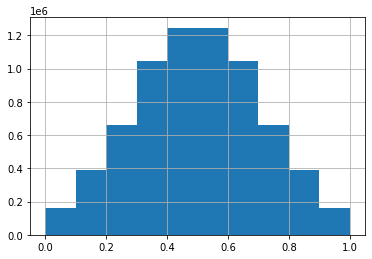

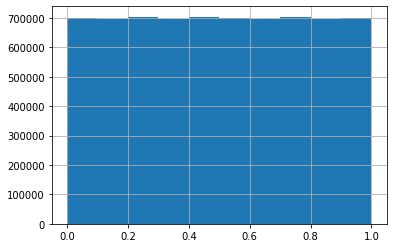

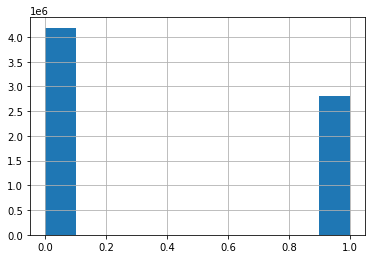

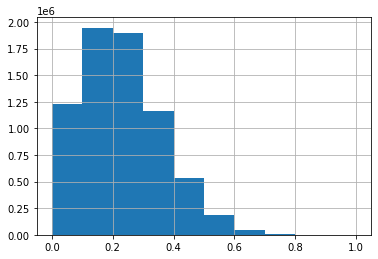

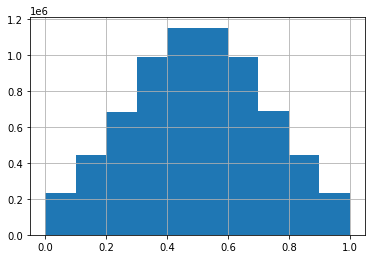

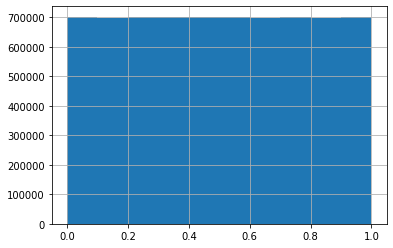

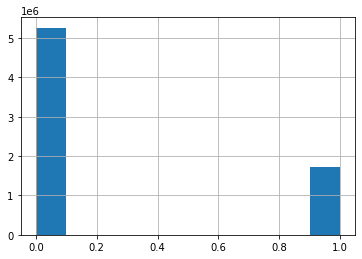

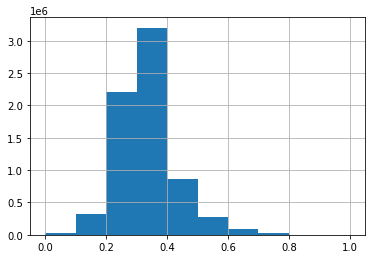

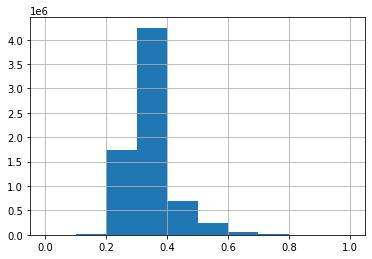

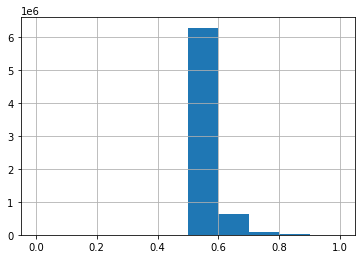

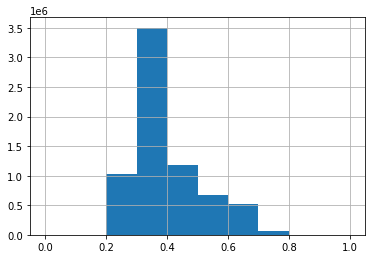

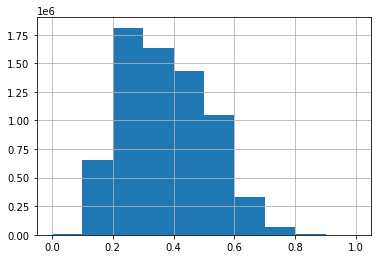

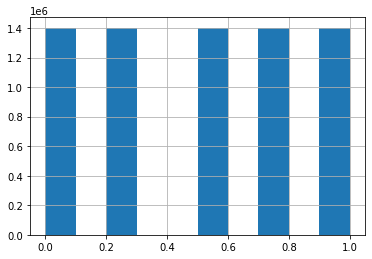

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=1776)

In [ ]:
x_train.shape

(5600000, 28)

In [ ]:
# Test - Build Sequential Model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(tf.keras.layers.Dense(200,activation='sigmoid'))  # adds a layer with 200 neurons, sigmoid activation
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))   # adds a layer with 100 neurons, sigmoid activation
model.add(tf.keras.layers.Dense(1, activation='linear'))  # adds a layer with 1 neurons, linear (aka NO) activation



In [ ]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error', 'accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test), batch_size=1000)


Epoch 1/5
5600/5600 [==============================] - 20s 3ms/step - loss: 0.2152 - mean_squared_error: 0.2152 - mean_absolute_error: 0.4583 - accuracy: 0.7530 - val_loss: 0.1657 - val_mean_squared_error: 0.1657 - val_mean_absolute_error: 0.3850 - val_accuracy: 0.8075
Epoch 2/5
5600/5600 [==============================] - 18s 3ms/step - loss: 0.1388 - mean_squared_error: 0.1388 - mean_absolute_error: 0.3200 - accuracy: 0.8218 - val_loss: 0.1299 - val_mean_squared_error: 0.1299 - val_mean_absolute_error: 0.2960 - val_accuracy: 0.8285
Epoch 3/5
5600/5600 [==============================] - 18s 3ms/step - loss: 0.1286 - mean_squared_error: 0.1286 - mean_absolute_error: 0.2931 - accuracy: 0.8308 - val_loss: 0.1276 - val_mean_squared_error: 0.1276 - val_mean_absolute_error: 0.2910 - val_accuracy: 0.8322
Epoch 4/5
5600/5600 [==============================] - 18s 3ms/step - loss: 0.1270 - mean_squared_error: 0.1270 - mean_absolute_error: 0.2900 - accuracy: 0.8326 - val_loss: 0.1271 - val_mean

In [ ]:
model.summary()
model_Weights = model.weights

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               5800      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 26,001
Trainable params: 26,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'accuracy', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_accuracy'])


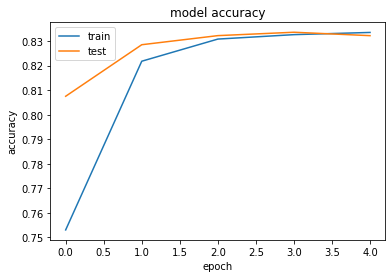

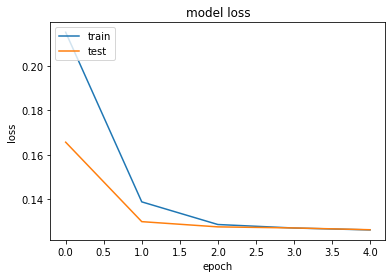

In [ ]:
print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Model 1 - Sequential

In [ ]:
X = df.drop(['target'],axis=1)
y = df['target'].values
y = y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.25, random_state=1776)

In [ ]:
x_train.shape

(5250000, 28)

In [ ]:
model_Classify = tf.keras.Sequential()

model_Classify.add(tf.keras.Input(shape=(28,)))
model_Classify.add(tf.keras.layers.Dense(500,activation='sigmoid', kernel_initializer='zeros'))  # adds a layer with 500 neurons, sigmoid activation
model_Classify.add(tf.keras.layers.Dense(250, activation='sigmoid'))   # adds a layer with 100 neurons, sigmoid activation
model_Classify.add(tf.keras.layers.Dense(100, activation='sigmoid'))   # adds a layer with 100 neurons, sigmoid activation
model_Classify.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # adds a layer with 1 neurons, sigmoid

model_Classify.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# 3 Sigmoid Middle relu - Layers = 85.9
# 3 Sigmoid Layers = 86.0
# 4 Sigmoid Layers = 84.0

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
model_Classify.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10, batch_size=1000, callbacks=[es])

Epoch 1/10
5250/5250 [==============================] - 19s 4ms/step - loss: 0.3654 - accuracy: 0.8317 - val_loss: 0.3231 - val_accuracy: 0.8446
Epoch 2/10
5250/5250 [==============================] - 18s 3ms/step - loss: 0.3216 - accuracy: 0.8452 - val_loss: 0.3194 - val_accuracy: 0.8464
Epoch 3/10
5250/5250 [==============================] - 18s 3ms/step - loss: 0.3162 - accuracy: 0.8487 - val_loss: 0.3034 - val_accuracy: 0.8558
Epoch 4/10
5250/5250 [==============================] - 18s 3ms/step - loss: 0.3008 - accuracy: 0.8578 - val_loss: 0.2982 - val_accuracy: 0.8590
Epoch 5/10
5250/5250 [==============================] - 18s 3ms/step - loss: 0.2983 - accuracy: 0.8594 - val_loss: 0.2967 - val_accuracy: 0.8602
Epoch 6/10
5250/5250 [==============================] - 18s 3ms/step - loss: 0.2971 - accuracy: 0.8600 - val_loss: 0.2976 - val_accuracy: 0.8599


In [ ]:
model_Classify.ac

In [ ]:
model_Classify.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               14500     
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dense_5 (Dense)             (None, 100)               25100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 164,951
Trainable params: 164,951
Non-trainable params: 0
_________________________________________________________________


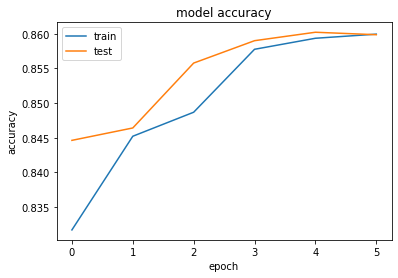

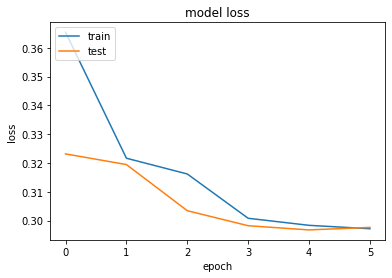

In [ ]:
# print(model_Classify.history.history.keys())
# summarize history for accuracy
plt.plot(model_Classify.history.history['accuracy'])
plt.plot(model_Classify.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_Classify.history.history['loss'])
plt.plot(model_Classify.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Build Layer Network

In [ ]:
model_new = tf.keras.Model()
inputs = tf.keras.Input(shape=(28,))  #notice i have to tell the input shape. I got away with NOT doing that in sequential
xx = tf.keras.layers.Dense(500, activation=tf.nn.relu)(inputs)
layer1 = tf.keras.layers.Dense(200, activation=tf.nn.relu)(xx)
layer2 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(layer1)
joined = tf.keras.layers.Concatenate(axis=1)([layer1,layer2])
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(joined)
model_new = tf.keras.Model(inputs=inputs, outputs=outputs)
model_new.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model_new.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10, batch_size=1000, callbacks=[es])

Epoch 1/10
5250/5250 [==============================] - 19s 3ms/step - loss: 0.2947 - accuracy: 0.8630 - val_loss: 0.2840 - val_accuracy: 0.8697
Epoch 2/10
5250/5250 [==============================] - 18s 3ms/step - loss: 0.2760 - accuracy: 0.8741 - val_loss: 0.2730 - val_accuracy: 0.8759
Epoch 3/10
5250/5250 [==============================] - 18s 3ms/step - loss: 0.2704 - accuracy: 0.8773 - val_loss: 0.2705 - val_accuracy: 0.8769
Epoch 4/10
5250/5250 [==============================] - 18s 3ms/step - loss: 0.2679 - accuracy: 0.8787 - val_loss: 0.2671 - val_accuracy: 0.8794
Epoch 5/10
5250/5250 [==============================] - 18s 3ms/step - loss: 0.2661 - accuracy: 0.8798 - val_loss: 0.2659 - val_accuracy: 0.8800
Epoch 6/10
5250/5250 [==============================] - 18s 3ms/step - loss: 0.2648 - accuracy: 0.8807 - val_loss: 0.2660 - val_accuracy: 0.8796


In [ ]:
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 500)          14500       ['input_3[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 200)          100200      ['dense_7[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 100)          20100       ['dense_8[0][0]']                
                                                                                            

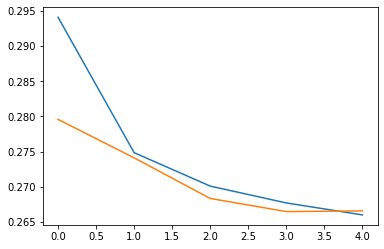

In [ ]:
train_loss = model_new.history.history['loss']
val_loss = model_new.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

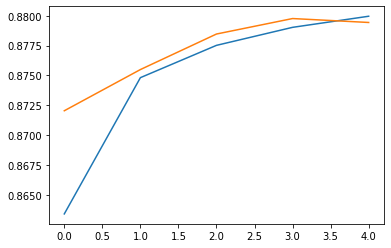

In [ ]:
train_acc = model_new.history.history['accuracy']
val_acc = model_new.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()